In [4]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [14]:
print(len(os.listdir('G:/COVID-19/X-Ray Image DataSet/Covid-19')))
print(len(os.listdir('G:/COVID-19/X-Ray Image DataSet/No_findings')))
print(tf.__version__)

149
300
2.0.0


In [3]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CORONA_SOURCE_DIR = "G:/COVID-19/X-Ray Image DataSet/Covid-19/"
TRAINING_CORONA_DIR = "G:/COVID-19/X-Ray Image DataSet/training/corona/"
TESTING_CORONA_DIR = "G:/COVID-19/X-Ray Image DataSet/testing/corona/"
NO_SOURCE_DIR = "G:/COVID-19/X-Ray Image DataSet/No_findings/"
TRAINING_NO_DIR = "G:/COVID-19/X-Ray Image DataSet/training/no_findings/"
TESTING_NO_DIR = "G:/COVID-19/X-Ray Image DataSet/testing/no_findings/"

split_size = .9
split_data(CORONA_SOURCE_DIR, TRAINING_CORONA_DIR, TESTING_CORONA_DIR, split_size)
split_data(NO_SOURCE_DIR, TRAINING_NO_DIR, TESTING_NO_DIR, split_size)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
optimizer = RMSprop(lr=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'],experimental_run_tf_function=False)


In [6]:
TRAINING_DIR = "G:/COVID-19/X-Ray Image DataSet/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "G:/COVID-19/X-Ray Image DataSet/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=10,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 320 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


In [7]:
history = model.fit(train_generator, epochs=35, steps_per_epoch=15,validation_data=validation_generator, validation_steps=5)
model.save('C:/Users/Abhinav/Downloads/corona.h5')

Epoch 1/35
15/15 [==============================] - 19s 1s/step - loss: 0.6846 - acc: 0.6200 - val_loss: 0.4852 - val_acc: 0.7600
Epoch 2/35
15/15 [==============================] - 12s 789ms/step - loss: 0.5487 - acc: 0.7133 - val_loss: 0.6021 - val_acc: 0.7000
Epoch 3/35
15/15 [==============================] - 12s 806ms/step - loss: 0.4545 - acc: 0.8167 - val_loss: 0.2958 - val_acc: 0.9000
Epoch 4/35
15/15 [==============================] - 12s 792ms/step - loss: 0.3819 - acc: 0.8433 - val_loss: 0.3042 - val_acc: 0.9200
Epoch 5/35
15/15 [==============================] - 12s 798ms/step - loss: 0.2887 - acc: 0.8833 - val_loss: 0.2332 - val_acc: 0.9400
Epoch 6/35
15/15 [==============================] - 12s 776ms/step - loss: 0.2724 - acc: 0.9067 - val_loss: 0.1842 - val_acc: 0.9400
Epoch 7/35
15/15 [==============================] - 13s 865ms/step - loss: 0.2253 - acc: 0.9133 - val_loss: 0.2271 - val_acc: 0.9200
Epoch 8/35
15/15 [==============================] - 12s 767ms/step - los

<Figure size 432x288 with 0 Axes>

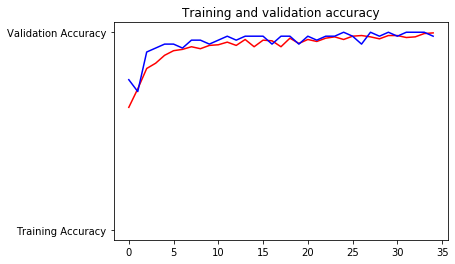

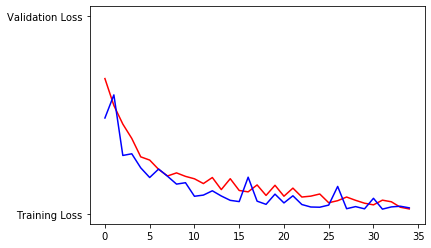

<Figure size 432x288 with 0 Axes>

In [8]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

[1.]
No287.jpg is a NADA
[1.]
No288.jpg is a NADA
[1.]
No289.jpg is a NADA
[1.]
No290.jpg is a NADA
[1.]
No291.jpg is a NADA
[1.]
No292.jpg is a NADA
[1.]
No293.jpg is a NADA
[1.]
No294.jpg is a NADA
[1.]
No295.jpg is a NADA
[1.]
No296.jpg is a NADA
[1.]
No297.jpg is a NADA
[1.]
No298.jpg is a NADA
[1.]
No299.jpg is a NADA
[1.]
No300.jpg is a NADA


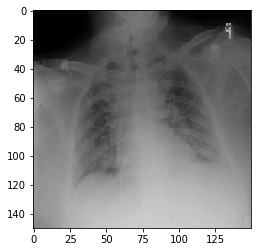

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os
files = []
for i in os.listdir('G:/COVID-19/X-Ray Image DataSet/tesht/'):
    path ='G:/COVID-19/X-Ray Image DataSet/tesht/'+i
    img= image.load_img(path, target_size=(150,150))

    
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    
    
    if classes[0]>0.5:
        print( i +" is a Normal")
    else:
        print(i+ " is a Covid")
plt.imshow(img)
        